# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [3]:
dataset_train = pd.read_csv("train.csv")
training_set = dataset_train.iloc[:,1:2].values

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.07400078]
 [0.08376722]
 [0.0838953 ]
 ...
 [0.93494592]
 [0.89789109]
 [0.9036741 ]]


### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
time_step = 60
for i in range(time_step, 2690):
  X_train.append(training_set_scaled[i-time_step : i, 0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)

[[0.07400078 0.08376722 0.0838953  ... 0.08463179 0.0870718  0.08162181]
 [0.08376722 0.0838953  0.08436281 ... 0.0870718  0.08162181 0.08018726]
 [0.0838953  0.08436281 0.08211493 ... 0.08162181 0.08018726 0.08559242]
 ...
 [0.80994191 0.83672437 0.8405605  ... 0.9394673  0.93684157 0.92015216]
 [0.83672437 0.8405605  0.84068218 ... 0.93684157 0.92015216 0.93494592]
 [0.8405605  0.84068218 0.85139004 ... 0.92015216 0.93494592 0.89789109]]


### Reshaping

In [6]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units= 100, return_sequences=True, input_shape =(X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units= 100, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units= 100, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units= 100, return_sequences=False))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
83/83 [==============================] - 16s 190ms/step - loss: 0.0138
Epoch 2/100
83/83 [==============================] - 16s 199ms/step - loss: 0.0037
Epoch 3/100
83/83 [==============================] - 16s 199ms/step - loss: 0.0035
Epoch 4/100
83/83 [==============================] - 16s 199ms/step - loss: 0.0032
Epoch 5/100
83/83 [==============================] - 17s 199ms/step - loss: 0.0027
Epoch 6/100
83/83 [==============================] - 17s 202ms/step - loss: 0.0025
Epoch 7/100
83/83 [==============================] - 17s 205ms/step - loss: 0.0023
Epoch 8/100
83/83 [==============================] - 17s 200ms/step - loss: 0.0025
Epoch 9/100
83/83 [==============================] - 17s 201ms/step - loss: 0.0024
Epoch 10/100
83/83 [==============================] - 16s 198ms/step - loss: 0.0021
Epoch 11/100
83/83 [==============================] - 17s 199ms/step - loss: 0.0020
Epoch 12/100
83/83 [==============================] - 17s 203ms/step - loss: 0.0021
E

## Part 3 - Making the predictions and visualising the results

In [16]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the real stock price of 2017

### Getting the predicted stock price of 2017

In [20]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

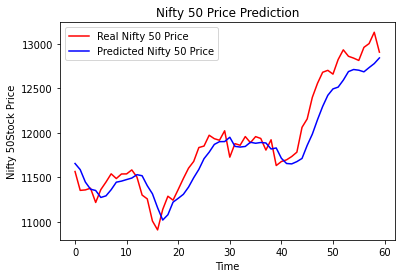

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Nifty 50 Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Nifty 50 Price')
plt.title('Nifty 50 Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nifty 50Stock Price')
plt.legend()
plt.show()